In [20]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
#lr

In [10]:
df = pd.read_csv(r"C:\Users\HP\Downloads\loan_data_file.csv")

In [11]:
df.head()

,Unnamed: 0,ListingKey,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,date,year,month,ListingCategory,WageGroup
0,0,1021339766868145413AB3B,C,36,1,0.16516,0.1580,0.1380,0.13885,0.0724,...,1.0,0,0,0.0,258,2007-08-26,2007,8,Not Available,MediumWage
1,11,0F1734025150298088A5F2B,C,36,1,0.15033,0.1325,0.1225,0.11335,0.0724,...,1.0,0,0,0.0,53,2007-10-09,2007,10,Not Available,LowWage
2,12,0F1A3597143888805163EF7,Unknown,36,0,0.17969,0.1435,0.1335,0.12640,0.0524,...,1.0,0,0,0.0,1,2013-12-15,2013,12,Debt Consolidation,LowWage
3,15,0F483544120452347F48121,Unknown,36,0,0.35797,0.3177,0.3077,0.28960,0.1650,...,1.0,0,0,0.0,10,2012-04-10,2012,4,Household Expenses,MediumWage
4,21,1017340630713945364DA6B,D,36,1,0.21488,0.2075,0.1975,0.18835,0.0724,...,1.0,0,0,0.0,53,2007-11-30,2007,11,Not Available,MediumWage


<Axes: >

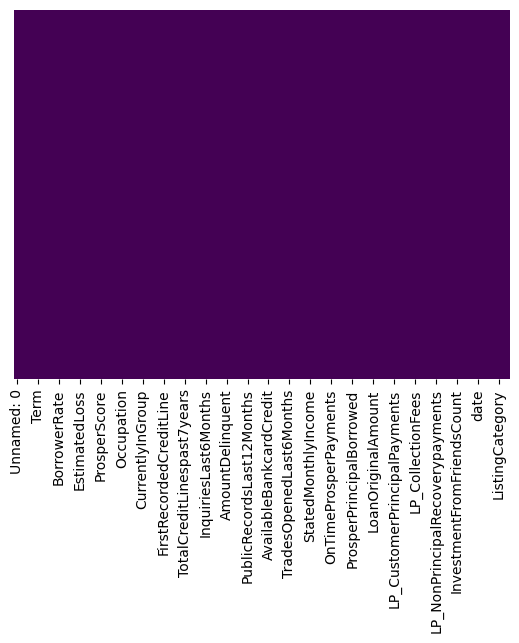

In [12]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49724 entries, 0 to 49723
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           49724 non-null  int64  
 1   ListingKey                           49724 non-null  object 
 2   CreditGrade                          49724 non-null  object 
 3   Term                                 49724 non-null  int64  
 4   LoanStatus                           49724 non-null  int64  
 5   BorrowerAPR                          49724 non-null  float64
 6   BorrowerRate                         49724 non-null  float64
 7   LenderYield                          49724 non-null  float64
 8   EstimatedEffectiveYield              49724 non-null  float64
 9   EstimatedLoss                        49724 non-null  float64
 10  EstimatedReturn                      49724 non-null  float64
 11  ProsperRating (numeric)     

In [14]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day as separate numerical columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original 'date' column as it's no longer needed
df = df.drop('date', axis=1)


# Convert 'FirstRecordedCreditLine' to datetime
df['FirstRecordedCreditLine'] = pd.to_datetime(df['FirstRecordedCreditLine'])

# Extract year, month, and day for 'FirstRecordedCreditLine'
df['FirstCreditLine_year'] = df['FirstRecordedCreditLine'].dt.year
df['FirstCreditLine_month'] = df['FirstRecordedCreditLine'].dt.month
df['FirstCreditLine_day'] = df['FirstRecordedCreditLine'].dt.day

# Drop the original 'FirstRecordedCreditLine' column as it's no longer needed
df = df.drop('FirstRecordedCreditLine', axis=1)

## calculating MI scores

In [15]:
from sklearn.preprocessing import LabelEncoder

# Selecting features and target variable
categorical_features = ['BorrowerState', 'Occupation', 'ListingCategory', 'WageGroup','ListingKey','CreditGrade','EmploymentStatus','IsBorrowerHomeowner','CurrentlyInGroup','GroupKey','IncomeVerifiable']  # ... include categorical columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding for each categorical column
for col in categorical_features:
    if col in df.columns:  # Check if the column exists in the DataFrame
        df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Drop original categorical columns
df = df.drop(categorical_features, axis=1)

# Separate features and target variable
X = df.drop("LoanStatus", axis=1)
y = df["LoanStatus"]

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=X.dtypes == int, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores.sort_values(ascending=False)

ListingKey_encoded              1.769032
LP_CustomerPrincipalPayments    0.523973
LP_GrossPrincipalLoss           0.457988
LP_NetPrincipalLoss             0.439844
LP_CustomerPayments             0.191233
                                  ...   
PublicRecordsLast12Months       0.000000
OpenRevolvingAccounts           0.000000
TotalCreditLinespast7years      0.000000
OpenCreditLines                 0.000000
IncomeVerifiable_encoded        0.000000
Name: MI Scores, Length: 72, dtype: float64

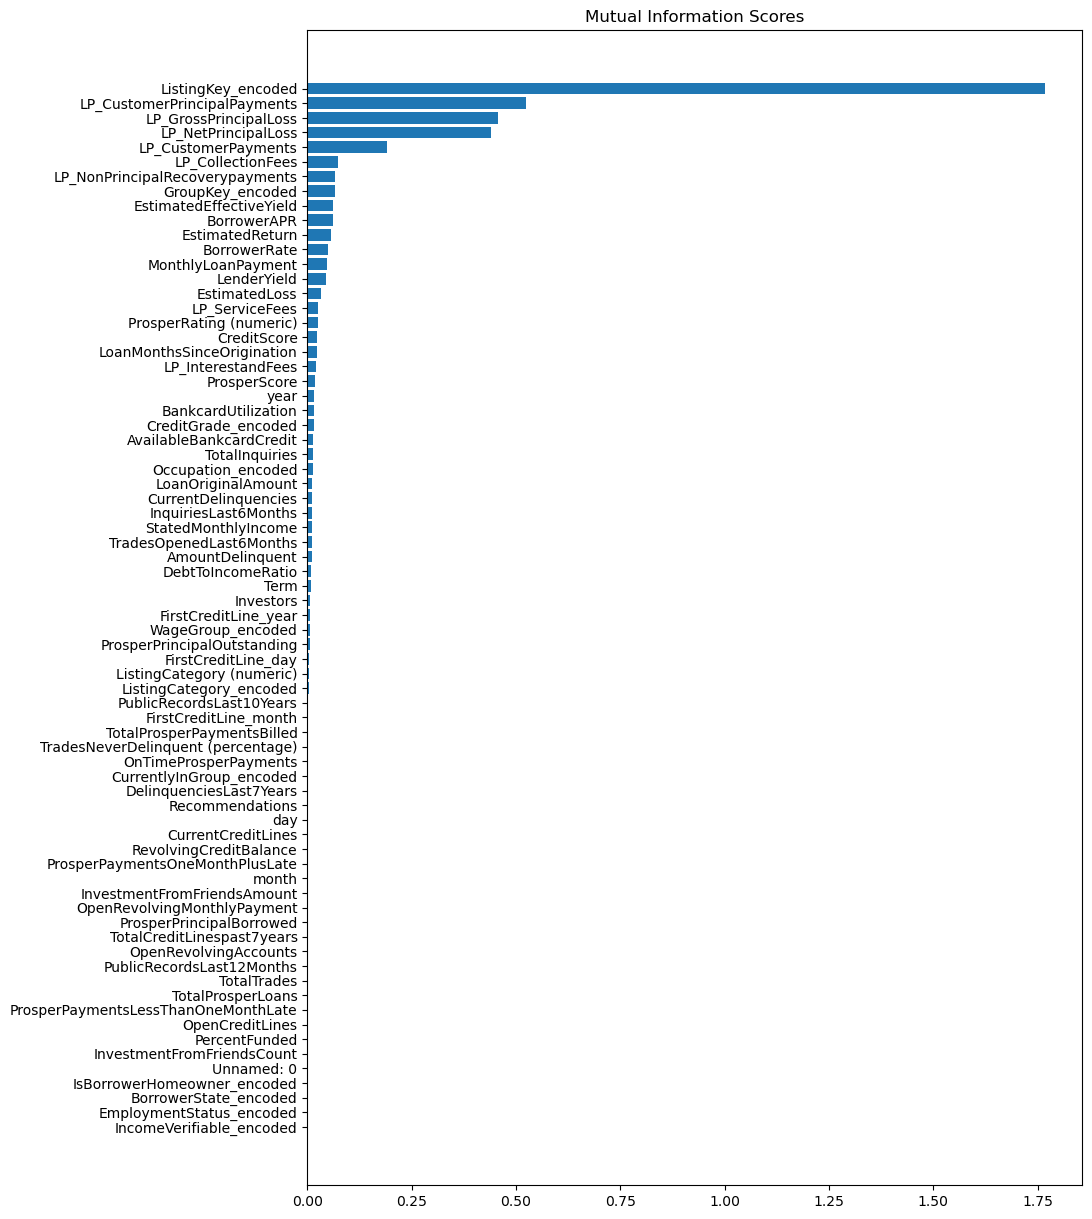

In [22]:
import matplotlib.pyplot as mpl_plot

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    mpl_plot.barh(width, scores)
    mpl_plot.yticks(width, ticks)
    mpl_plot.title("Mutual Information Scores")


mpl_plot.figure(dpi=100, figsize=(10, 15))
plot_mi_scores(mi_scores.sort_values(ascending=False))

In [23]:
# feature selection
selected_features = X.drop(X.columns[mi_scores < 0.04],axis=1)
selected_features

,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedReturn,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,ListingKey_encoded,GroupKey_encoded
0,0.16516,0.1580,0.1380,0.13885,0.06645,330.43,11396.1400,9425.00,0.0,0.00,0.00,0.0,3153,554
1,0.15033,0.1325,0.1225,0.11335,0.04095,33.81,1011.6500,1000.00,0.0,0.00,0.00,0.0,2954,554
2,0.17969,0.1435,0.1335,0.12640,0.07400,137.39,135.8174,88.64,0.0,0.00,0.00,0.0,2959,554
3,0.35797,0.3177,0.3077,0.28960,0.12460,173.71,521.1300,209.75,0.0,3790.25,3790.25,0.0,2992,554
4,0.21488,0.2075,0.1975,0.18835,0.11595,112.64,4061.0500,3000.00,0.0,0.00,0.00,0.0,3143,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49719,0.07469,0.0679,0.0579,0.04875,-0.02365,132.11,4756.9200,4291.99,0.0,0.00,0.00,0.0,44053,458
49720,0.22362,0.1899,0.1799,0.17570,0.11470,73.30,2083.6200,2000.00,0.0,0.00,0.00,0.0,44059,554
49721,0.30285,0.2639,0.2539,0.23180,0.10930,101.25,2672.5800,2500.00,0.0,0.00,0.00,0.0,44068,554
49722,0.13220,0.1110,0.1010,0.10070,0.08070,65.57,2330.5500,1997.16,0.0,0.00,0.00,0.0,44741,554


In [24]:
selected_features.shape

(49724, 14)

In [26]:
# normalization
selected_features = (selected_features - selected_features.min()) / (selected_features.max() - selected_features.min())

In [27]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(selected_features)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.297523,0.435080,0.168834,-0.035874,0.020833,-0.014820,0.016172,-0.010425,0.006321,-0.013241,0.003746,-0.002353,0.001031,0.021497
1,0.349147,0.435868,-0.164476,-0.140413,-0.148294,-0.004360,0.026180,-0.010663,0.002436,-0.005513,-0.000214,-0.000814,-0.000241,0.001363
2,0.252410,0.436539,-0.169165,-0.137526,-0.140623,-0.028962,-0.002489,0.057598,-0.005860,0.005847,0.005270,-0.001686,0.000230,-0.000947
3,-0.615312,0.444220,-0.126598,-0.071028,0.058970,0.036170,0.095650,-0.009580,-0.010560,0.001772,-0.009354,0.001579,-0.000091,0.000296
4,-0.008066,0.436794,-0.139703,0.459815,-0.190487,-0.044078,-0.003522,-0.010995,0.007469,-0.020373,-0.001416,0.000202,0.000129,-0.005816


## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(selected_features,df['LoanStatus'], test_size=0.30, random_state=101)

## Training and predicting

In [36]:
from sklearn.linear_model import LogisticRegression

In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
predictions = logmodel.predict(X_test)

## Evaluation

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      4927
           1       0.94      1.00      0.97      9991

    accuracy                           0.96     14918
   macro avg       0.97      0.94      0.95     14918
weighted avg       0.96      0.96      0.96     14918



In [44]:
accuracy = logmodel.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9581713366403003
